In [1]:
!pip install numpy
!pip install pandas
!pip install tensorflow_cpu==2.18.0


In [2]:
import pandas as pd
import numpy as np
import keras


In [3]:
df = pd.read_csv('/content/spg.csv')

In [4]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [6]:
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [7]:
df.duplicated().sum()

np.int64(0)

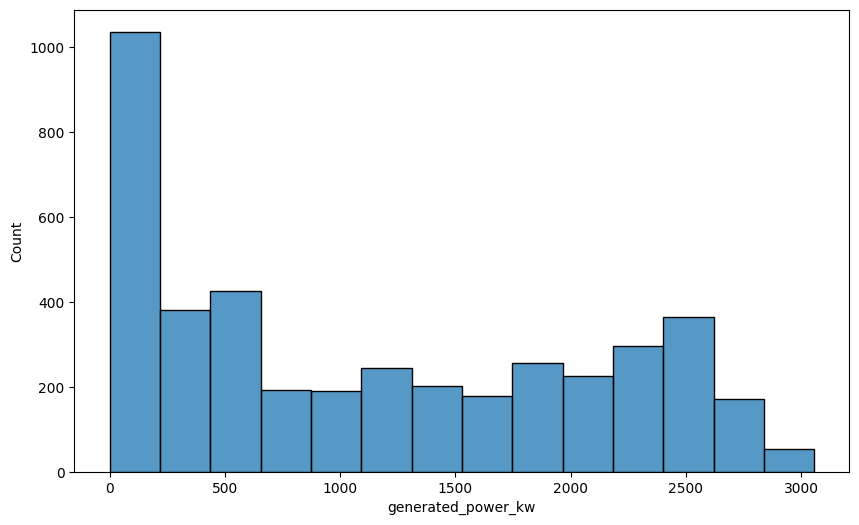

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'])
plt.show()

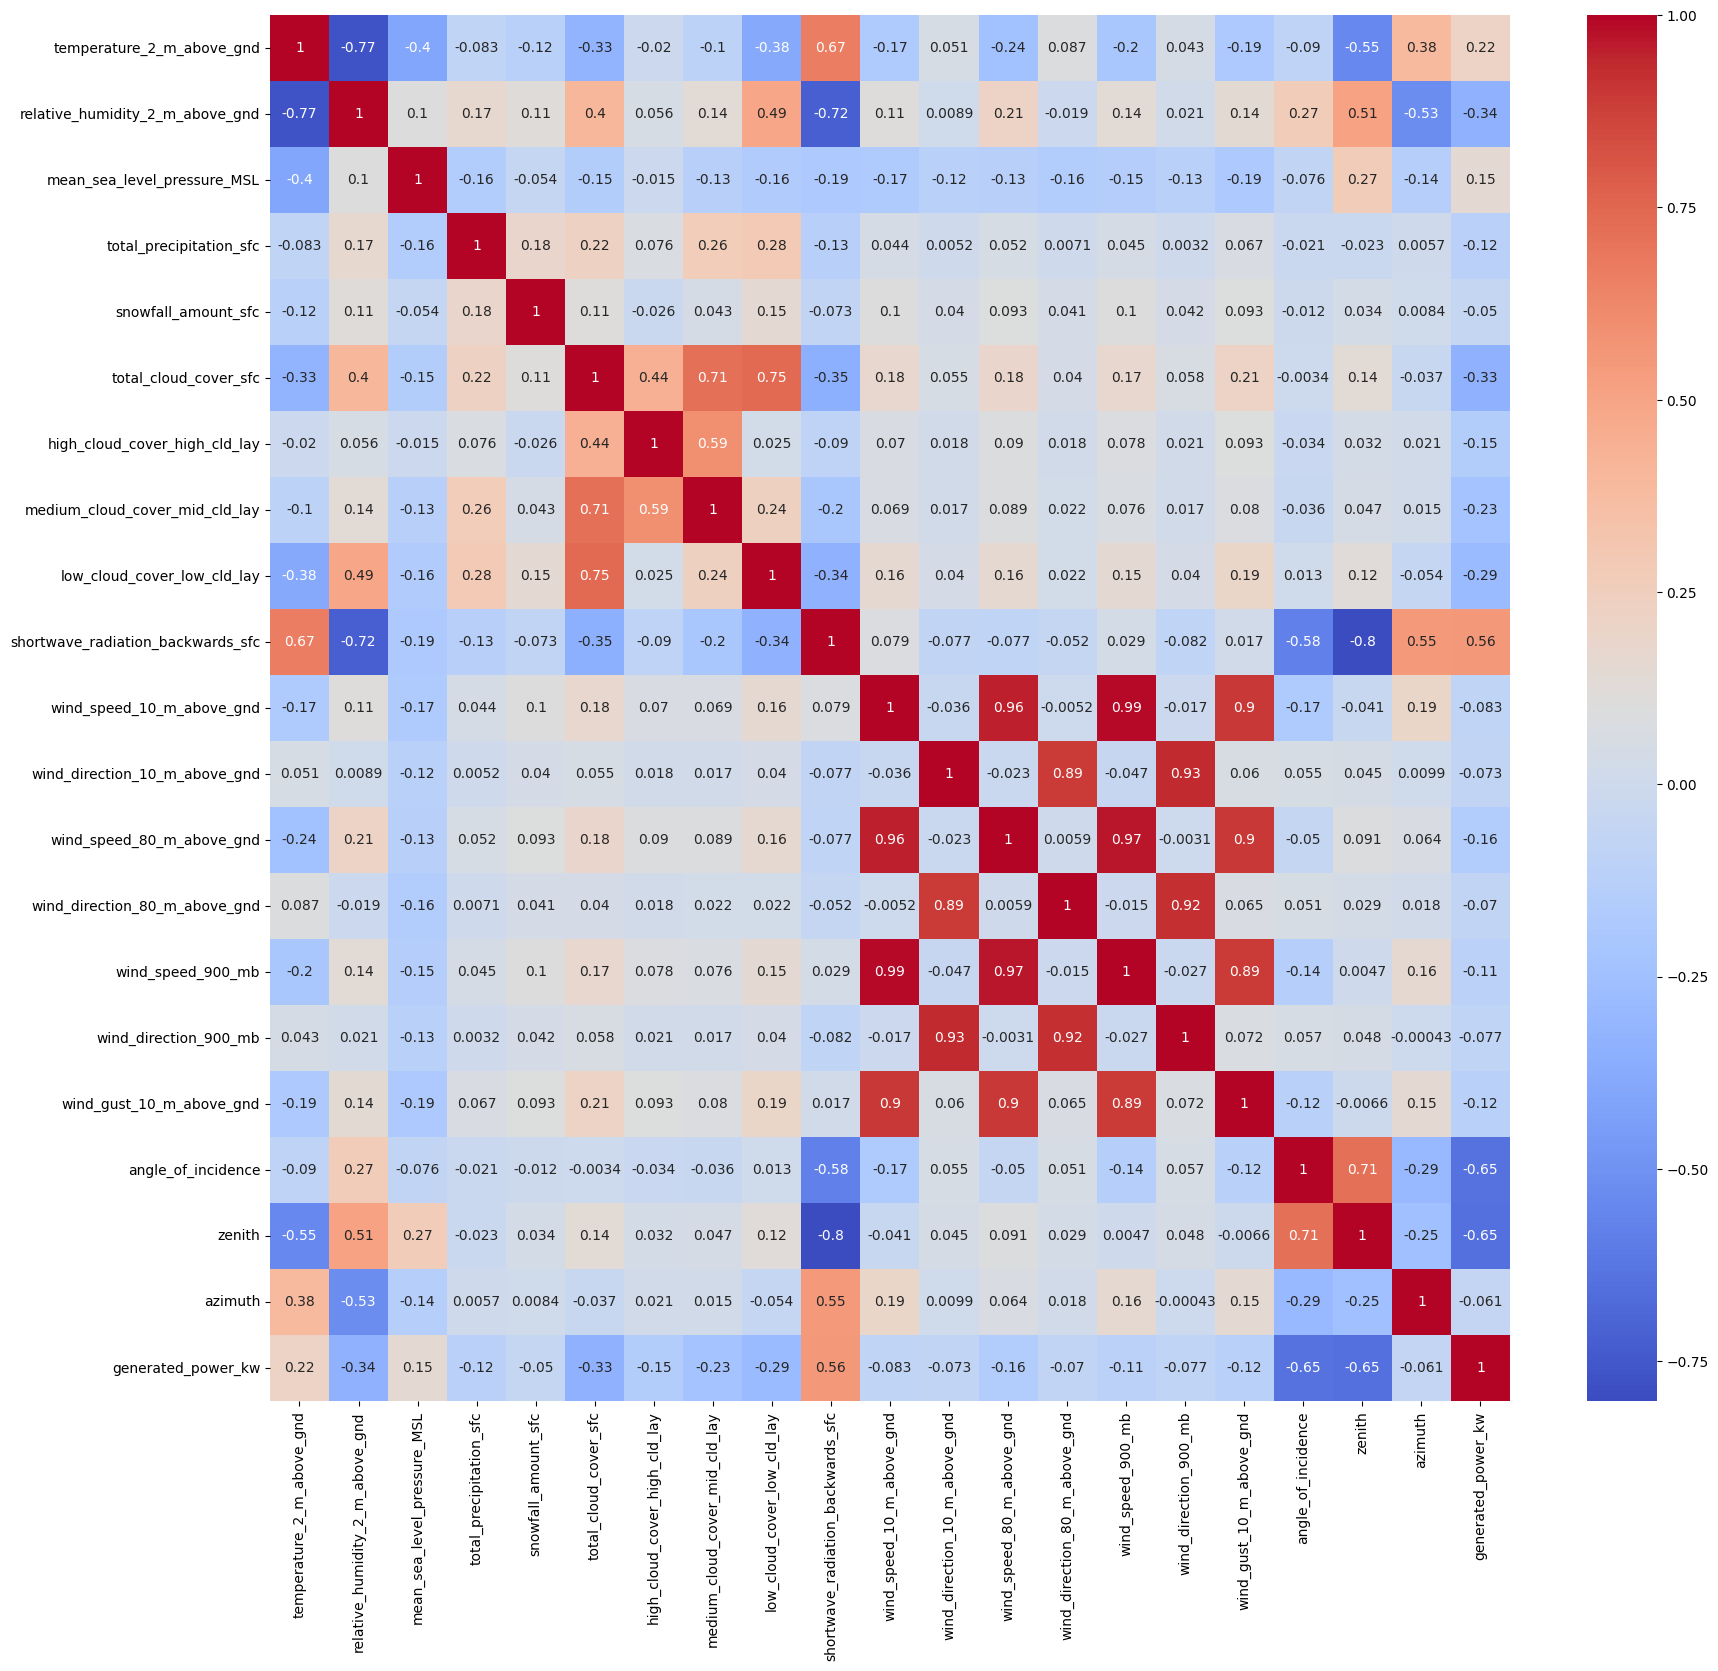

In [9]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
drop_features = [
    "medium_cloud_cover_mid_cld_lay",
    "wind_direction_900_mb",
    "wind_direction_80_m_above_gnd",
    "snowfall_amount_sfc",
    "wind_speed_900_mb",
    "wind_direction_10_m_above_gnd",
    "low_cloud_cover_mid_cld_lay",
    "total_cloud_cover_sfc"
    "wind_speed_10_m_above_gnd",
    "wind_speed_900_mb",
    "wind_speed_80_m_above_gnd",
    "wind_gust_10_m_above_gnd",

]

df = df.drop(columns=drop_features, errors="ignore")



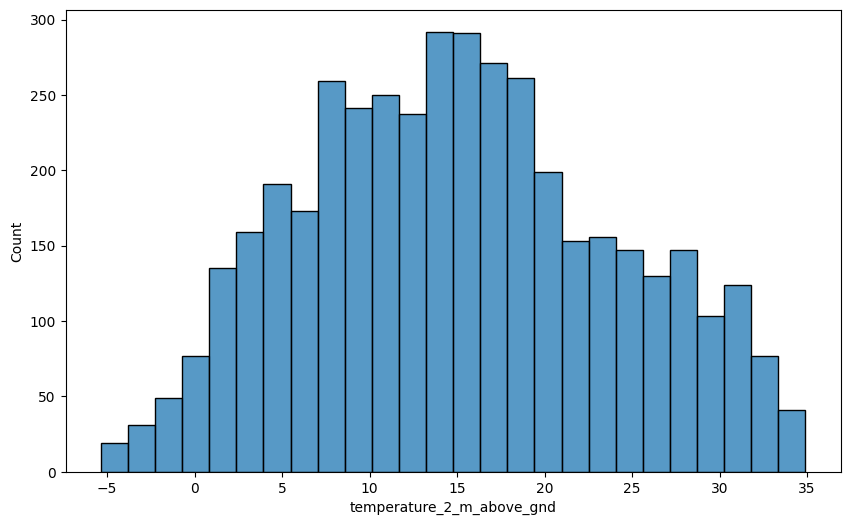

temperature_2_m_above_gnd
count    4213.000000
mean       15.068111
std         8.853677
min        -5.350000
25%         8.390000
50%        14.750000
75%        21.290000
max        34.900000
Name: temperature_2_m_above_gnd, dtype: float64


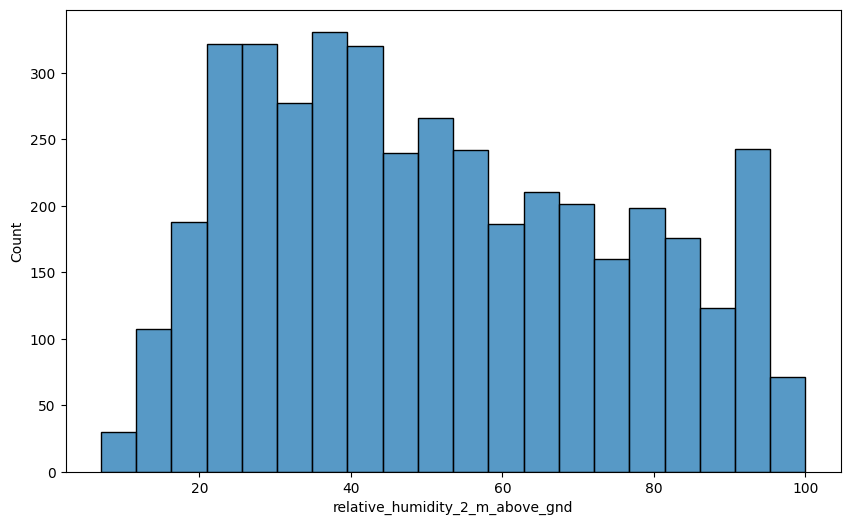

relative_humidity_2_m_above_gnd
count    4213.000000
mean       51.361025
std        23.525864
min         7.000000
25%        32.000000
50%        48.000000
75%        70.000000
max       100.000000
Name: relative_humidity_2_m_above_gnd, dtype: float64


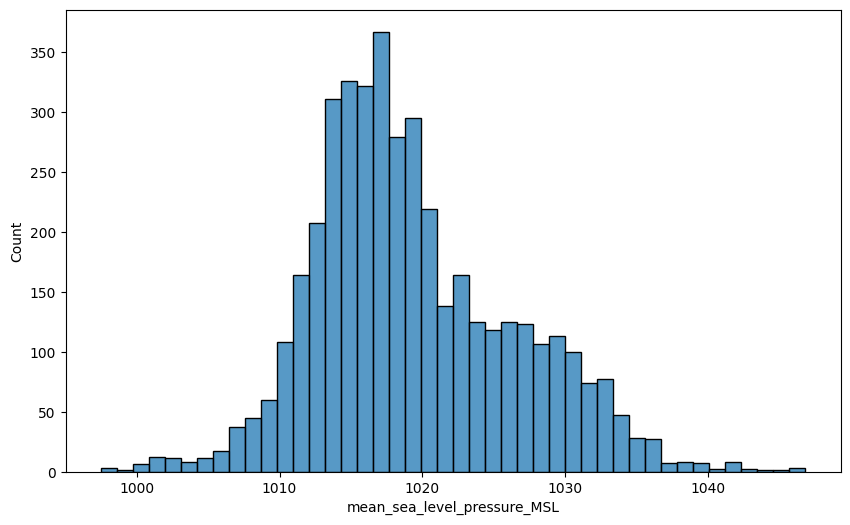

mean_sea_level_pressure_MSL
count    4213.000000
mean     1019.337812
std         7.022867
min       997.500000
25%      1014.500000
50%      1018.100000
75%      1023.600000
max      1046.800000
Name: mean_sea_level_pressure_MSL, dtype: float64


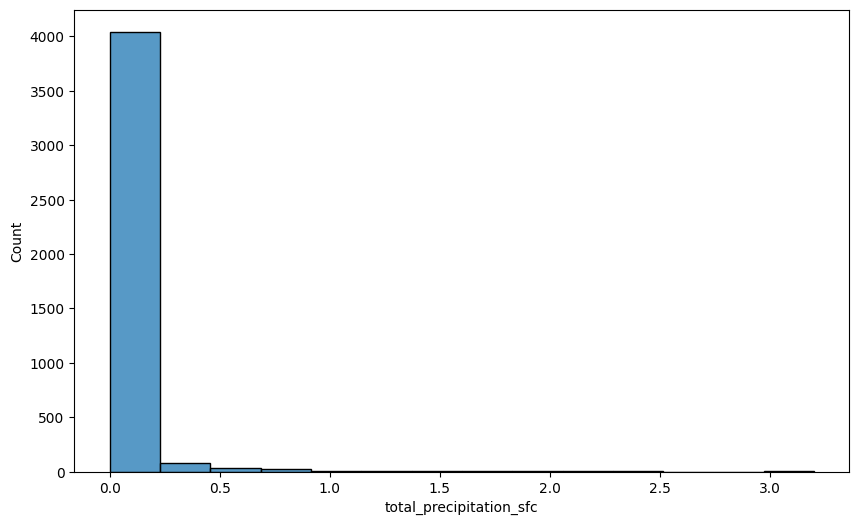

total_precipitation_sfc
count    4213.000000
mean        0.031759
std         0.170212
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.200000
Name: total_precipitation_sfc, dtype: float64


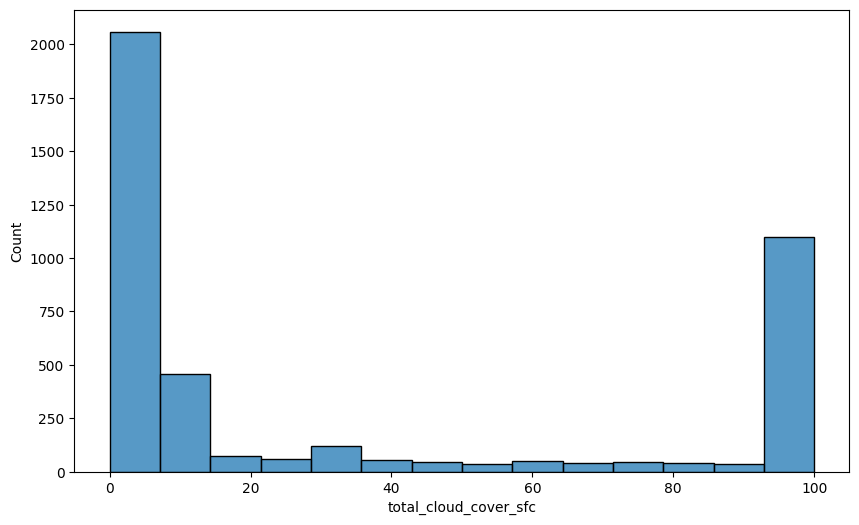

total_cloud_cover_sfc
count    4213.000000
mean       34.056990
std        42.843638
min         0.000000
25%         0.000000
50%         8.700000
75%       100.000000
max       100.000000
Name: total_cloud_cover_sfc, dtype: float64


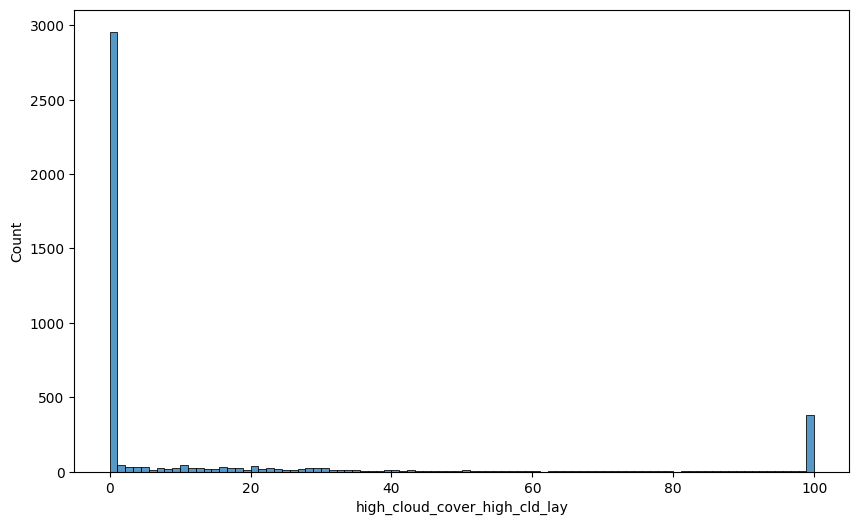

high_cloud_cover_high_cld_lay
count    4213.000000
mean       14.458818
std        30.711707
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       100.000000
Name: high_cloud_cover_high_cld_lay, dtype: float64


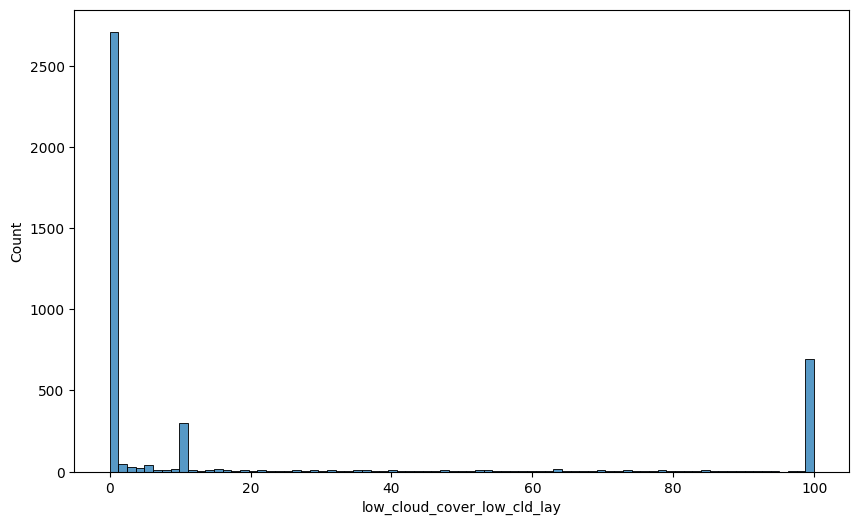

low_cloud_cover_low_cld_lay
count    4213.000000
mean       21.373368
std        38.013885
min         0.000000
25%         0.000000
50%         0.000000
75%        10.000000
max       100.000000
Name: low_cloud_cover_low_cld_lay, dtype: float64


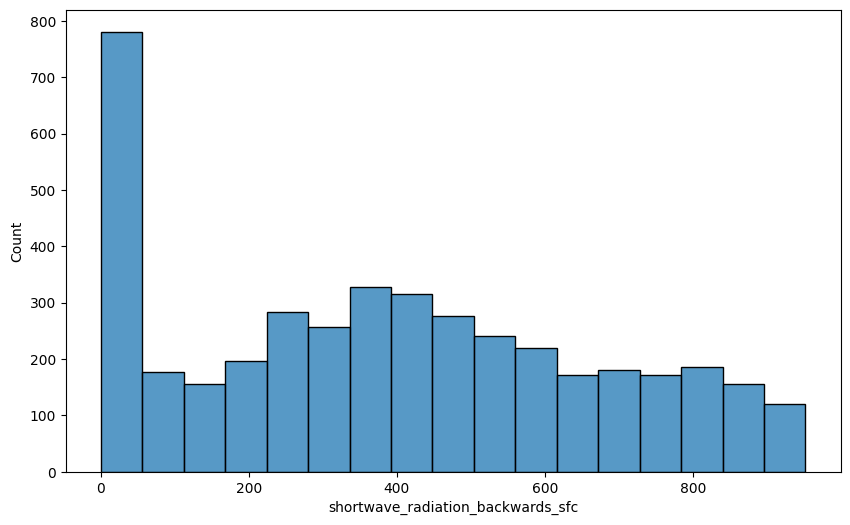

shortwave_radiation_backwards_sfc
count    4213.000000
mean      387.759036
std       278.459293
min         0.000000
25%       142.400000
50%       381.810000
75%       599.860000
max       952.300000
Name: shortwave_radiation_backwards_sfc, dtype: float64


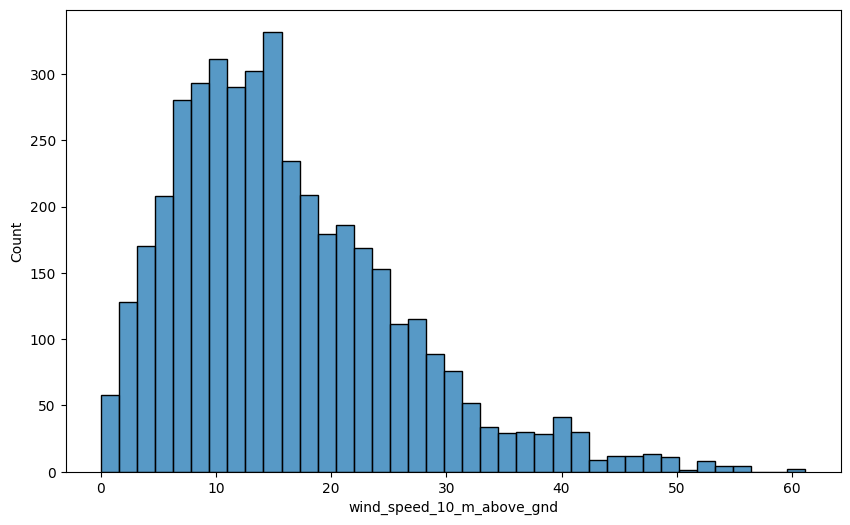

wind_speed_10_m_above_gnd
count    4213.000000
mean       16.228787
std         9.876948
min         0.000000
25%         9.010000
50%        14.460000
75%        21.840000
max        61.180000
Name: wind_speed_10_m_above_gnd, dtype: float64


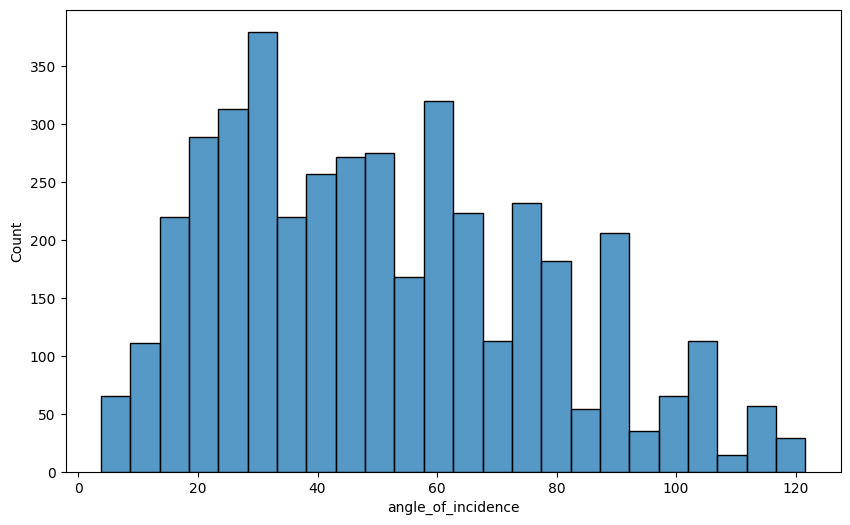

angle_of_incidence
count    4213.000000
mean       50.837490
std        26.638965
min         3.755323
25%        29.408181
50%        47.335557
75%        69.197492
max       121.635920
Name: angle_of_incidence, dtype: float64


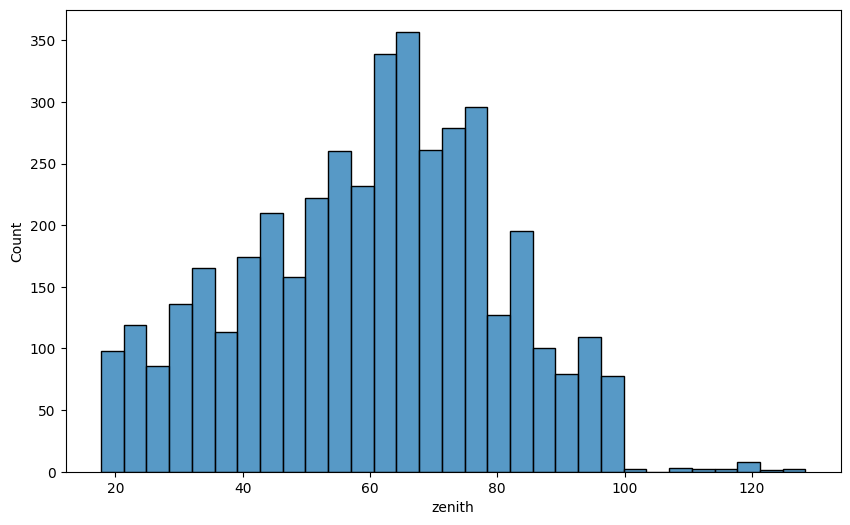

zenith
count    4213.000000
mean       59.980947
std        19.857711
min        17.727761
25%        45.291631
50%        62.142611
75%        74.346737
max       128.415370
Name: zenith, dtype: float64


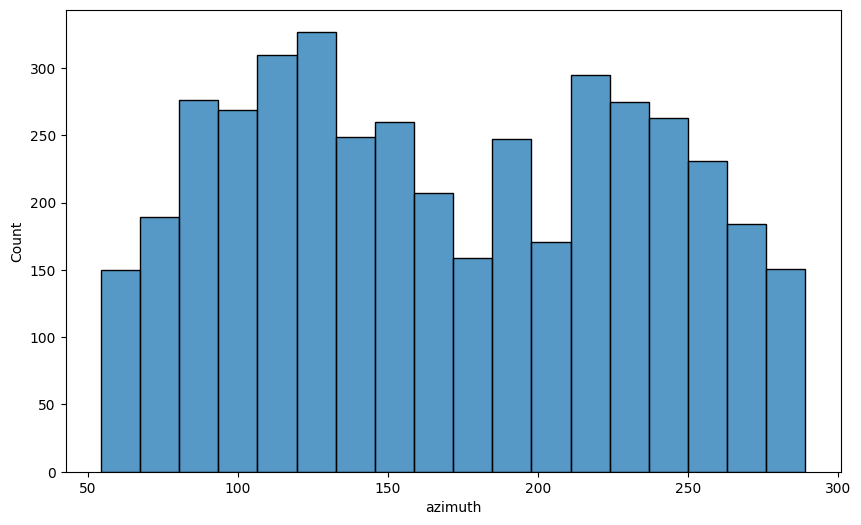

azimuth
count    4213.000000
mean      169.167651
std        64.568385
min        54.379093
25%       114.136600
50%       163.241650
75%       225.085620
max       289.045180
Name: azimuth, dtype: float64


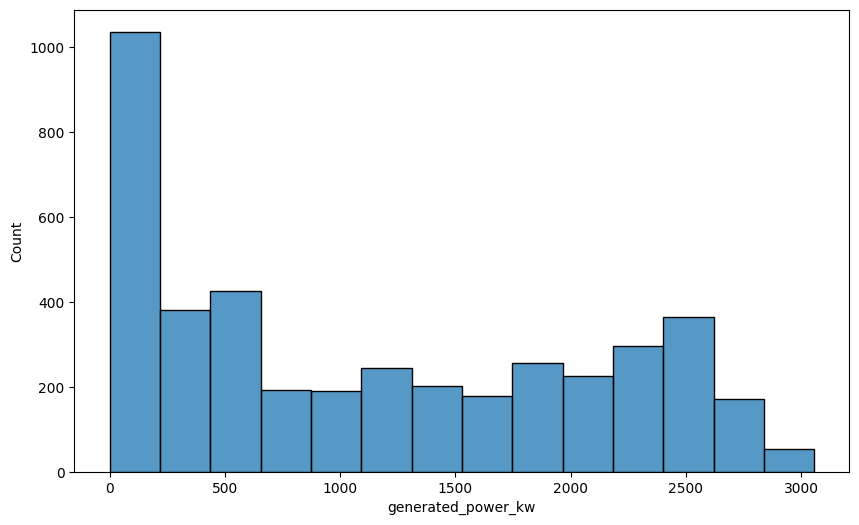

generated_power_kw
count    4213.000000
mean     1134.347313
std       937.957247
min         0.000595
25%       231.700450
50%       971.642650
75%      2020.966700
max      3056.794100
Name: generated_power_kw, dtype: float64


In [11]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col])
    plt.show()
    print(col)
    print(df[col].describe())

In [12]:
df['delta_angle'] = abs(df['angle_of_incidence'] - df['zenith'])
df['temp_humidity_index'] = df['temperature_2_m_above_gnd'] * df['relative_humidity_2_m_above_gnd']

In [13]:
from sklearn.model_selection import train_test_split

y = df['generated_power_kw']
X = df.drop('generated_power_kw', axis=1)

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler  =  StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_val   =  scaler.transform(X_val)
X_test  =  scaler.transform(X_test)

n_cols = X_train.shape[1]


In [16]:
n_cols

14

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [18]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(n_cols,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [19]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=64, verbose=1, callbacks=[early_stopping])


Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2128962.0000 - mean_absolute_error: 1123.9738 - val_loss: 2221758.5000 - val_mean_absolute_error: 1175.2185
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2078167.0000 - mean_absolute_error: 1102.3267 - val_loss: 2138485.0000 - val_mean_absolute_error: 1148.3912
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1975231.5000 - mean_absolute_error: 1071.0659 - val_loss: 1901363.0000 - val_mean_absolute_error: 1076.6539
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1726876.1250 - mean_absolute_error: 992.4890 - val_loss: 1463220.5000 - val_mean_absolute_error: 938.4337
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1272304.3750 - mean_absolute_error: 848.5327 - val_loss: 932178.6250 - val_mean_absolute_error: 751.6874
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 787582.3125 - mean_absolute_error: 675.6857 - val_loss: 551593.6250 - val_mean_absolute_error: 576.7576
Epoc

In [20]:
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_val   = r2_score(y_val, y_val_pred)

print("R²: Training:", r2_train)
print("R²: Validation:", r2_val)


R²: Training: 0.8331967774837015
R²: Validation: 0.7637221818763292


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)



27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE : 193376.57690775578
RMSE: 439.74603683007285
MAE : 294.93147143365076
R²  : 0.7883040532997134


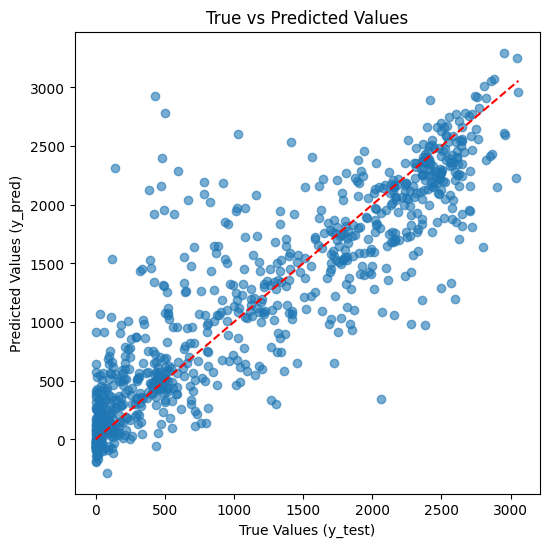

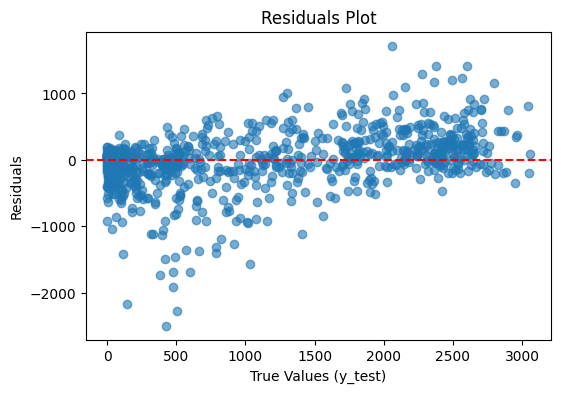

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs Predicted Values")
plt.show()

residuals = y_test - y_pred.flatten()
plt.figure(figsize=(6,4))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("True Values (y_test)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [24]:
model.save("my_model.keras")

import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [25]:

import joblib

scaler = joblib.load("scaler.pkl")
model = keras.models.load_model("my_model.keras")





In [26]:
from sklearn.inspection import permutation_importance


feature_names = X.columns.tolist()

def r2_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return r2_score(y, y_pred)

perm = permutation_importance(
    model,
    X_test,
    y_test,
    scoring=r2_scorer,
    n_repeats=10,
    random_state=42
)

importance_scaled = perm.importances_mean
importance_scaled /= importance_scaled.sum()

for name, imp in zip(feature_names, importance_scaled):
    print(f"{name}: {imp:.3f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
